In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [3]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [4]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

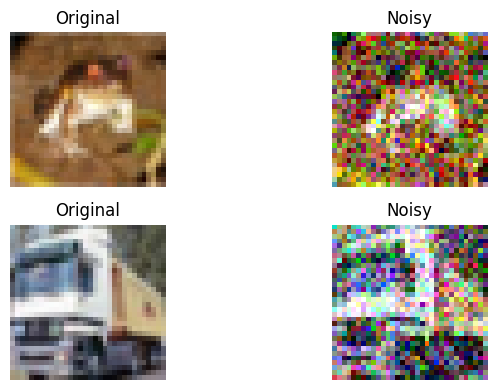

In [5]:
plt.figure(figsize=(8, 4))
for i in range(2):
    # Original image
    ax = plt.subplot(2, 2, i * 2 + 1)
    plt.imshow(x_train[i])
    plt.title("Original")
    plt.axis("off")

    # Noisy image
    ax = plt.subplot(2, 2, i * 2 + 2)
    plt.imshow(x_train_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)  # (8, 8, 16)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')


In [7]:
autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=128,shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 0.0238 - val_loss: 0.0101
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 0.0092 - val_loss: 0.0083
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0076 - val_loss: 0.0073
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0069 - val_loss: 0.0067
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0064 - val_loss: 0.0065
Epoch 12/20
391/391 ━━━━━━━━━━

In [10]:
decoded_imgs = autoencoder.predict(x_test_noisy[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


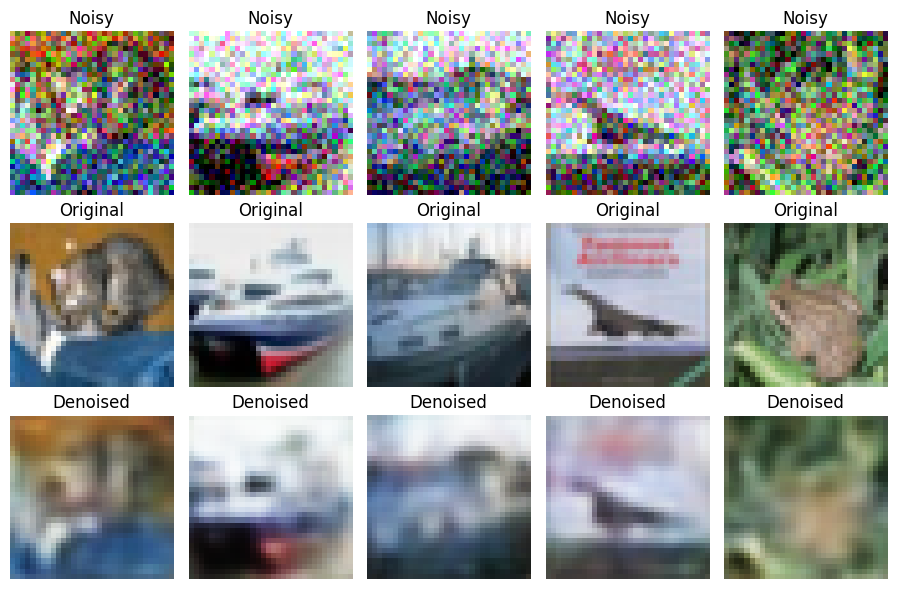

In [12]:
plt.figure(figsize=(18, 6))
for i in range(5):
    # Noisy input
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

    # Clean original
    ax = plt.subplot(3, 10, i + 11)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # Denoised output
    ax = plt.subplot(3, 10, i + 21)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised")
    plt.axis("off")

plt.tight_layout()
plt.show()
